<a href="https://colab.research.google.com/github/Esprit23/classifiaction_image/blob/main/classification_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Charger et normaliser les données

In [ ]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Construction du modèle CNN

### Initialiser le modèle

In [ ]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



## Compilation du modèle

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entraînement du modèle

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 96ms/step - accuracy: 0.2566 - loss: 1.9922 - val_accuracy: 0.4847 - val_loss: 1.4181
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.4819 - loss: 1.4312 - val_accuracy: 0.5639 - val_loss: 1.2382
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.5456 - loss: 1.2781 - val_accuracy: 0.6067 - val_loss: 1.1019
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.5907 - loss: 1.1498 - val_accuracy: 0.6332 - val_loss: 1.0326
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 98ms/step - accuracy: 0.6297 - loss: 1.0650 - val_accuracy: 0.6493 - val_loss: 0.9902
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.6596 - loss: 0.9741 - val_accuracy: 0.6710 - val_loss: 0.9322
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.6795 - loss: 0.9216 - val_accuracy: 0.6901 - val_loss: 0.8948
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.6982 - loss: 0.8690 - 

#Réalisation

##Résultats et évaluation

In [ ]:
# Évaluation sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Précision sur l'ensemble de test : {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7060 - loss: 0.8362
Précision sur l'ensemble de test : 0.7085


#Visualisation des performances

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


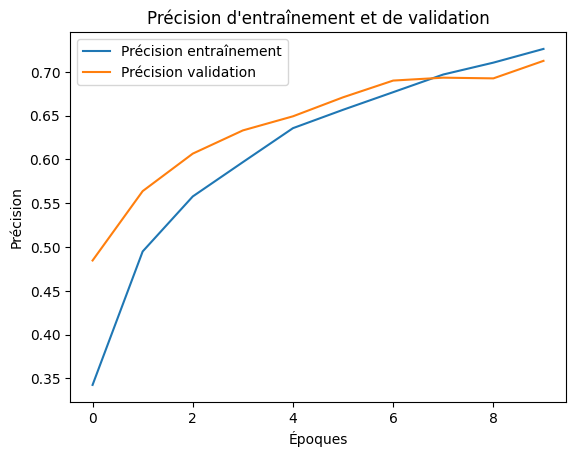

In [ ]:
# Courbes de précision
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.title('Précision d\'entraînement et de validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()


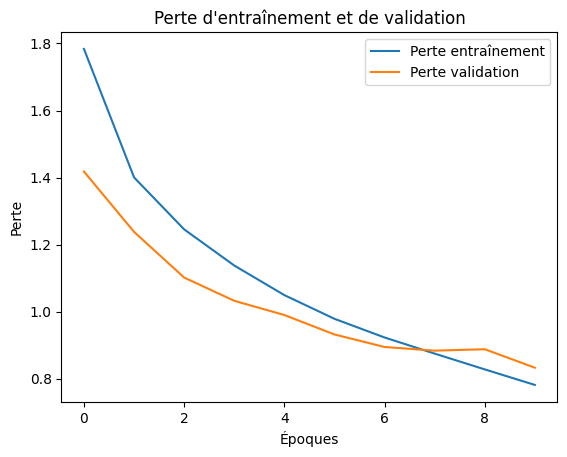

In [ ]:
# prompt: visualisation de performance Courbes de perte

# Courbes de perte
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title('Perte d\'entraînement et de validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

## Afficher des exemples avec les prédictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


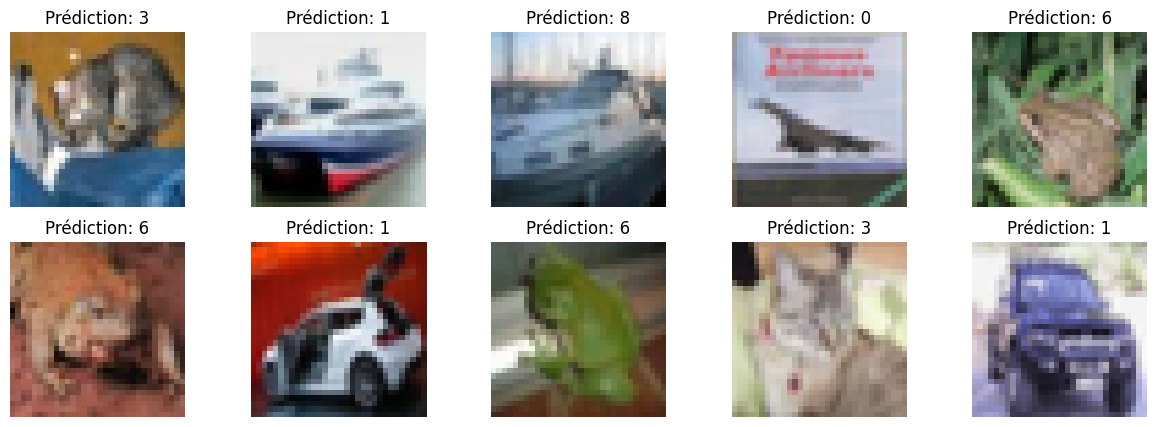

In [ ]:
# prompt: Afficher des exemples avec les prédictions

# Obtenir les prédictions pour les 10 premières images de l'ensemble de test
predictions = model.predict(X_test[:10])

# Afficher les images avec leurs prédictions
plt.figure(figsize=(15, 5))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_test[i])
  plt.title(f"Prédiction: {predictions[i].argmax()}")
  plt.axis('off')

plt.show()

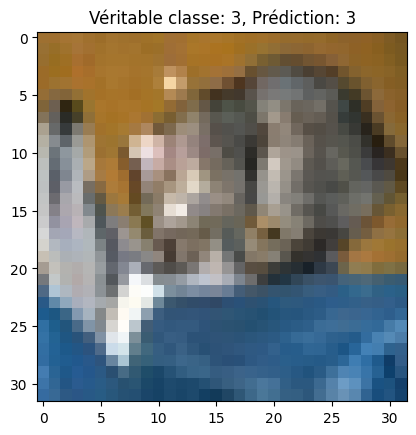

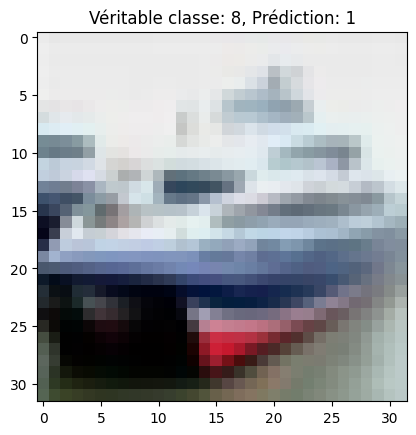

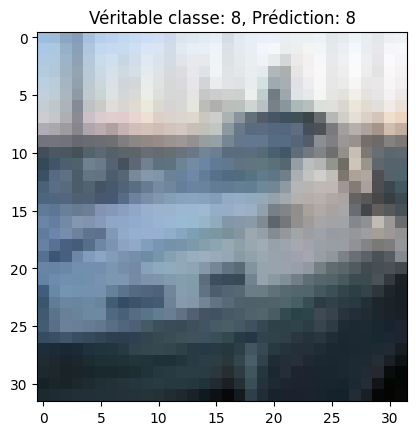

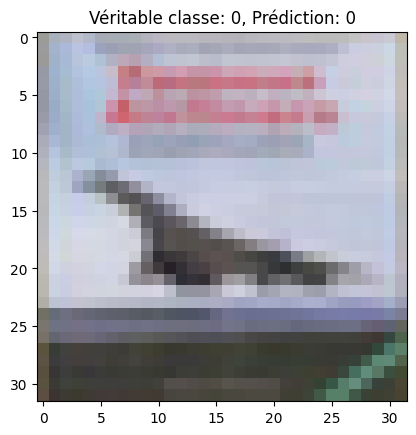

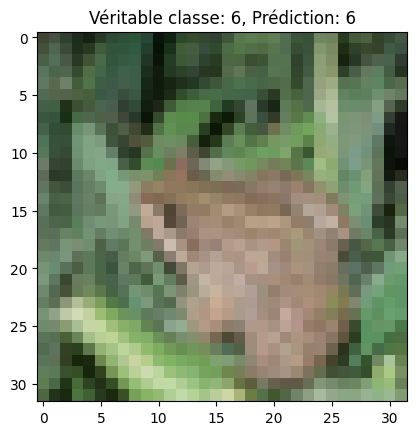

In [ ]:
# Afficher des exemples avec les prédictions
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Véritable classe: {np.argmax(y_test[i])}, Prédiction: {np.argmax(predictions[i])}")
    plt.show()